# HR ANALYTICS: Analyzing and predicting employee churn using python . 


### PROBLEMS in HR Department:
#### 1)Hiring
#### 2)Retention
#### 3)Performance Evaluation  



### Problem Statement-As employee attritions happens,companies have to hire new employees and it is very costly process.Here we try to analyze the reasons for employee attrition and predict employee churn.

In [1]:
import os
os.getcwd()

os.chdir('C:\\Users\\ASHOK\\Desktop\\projects\\hr_analytics_churn')

In [2]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("employee_churn.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### No of categorical column=2
### No of numerical column=8


### Categorical variable are of two types
#### 1)Nominal     
#### 2)Ordinal


In [5]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#Checking unique values of categorical variable
print(data.department.unique())
print(data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


#### 1)Department-Nominal
#### 2)Salary-Ordinal

In [8]:
#Changing the salary column data type from object to category
data.salary=data.salary.astype('category')

In [9]:
#Ordering categories of salary column
data.salary=data.salary.cat.reorder_categories(['low','medium','high'])

In [10]:
#Encoding caegorical variables with integer values
data.salary=data.salary.cat.codes

In [11]:
#Convert department column to dummy indicator and save them in dataframe departments
departments=pd.get_dummies(data.department)

In [12]:
print(departments.head())

   IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0   0      0           0   0           0          0            0      1   
1   0      0           0   0           0          0            0      1   
2   0      0           0   0           0          0            0      1   
3   0      0           0   0           0          0            0      1   
4   0      0           0   0           0          0            0      1   

   support  technical  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  


### Dummy trap

A dummy trap is a situation where different dummy variables convey the same information. In this case, if an employee is, say, from the accounting department (i.e. value in the accounting column is 1), then we're certain that she/he is not from any other department (values everywhere else are 0). Thus, we could actually learn about his/her department by looking at all the other departments.

For that reason, whenever  dummies are created (in our case, 10), only   1 (in our case, 9) of them are enough, and the the column's information is already included.

Therefore, we will get rid of the old department column, drop one of the department dummies to avoid dummy trap, and then merge the two DataFrames.

In [13]:
#Drop accounting column to avoid dummy trap
departments = departments.drop("accounting", axis=1)

In [14]:
#Dropping old department column as we don't need it
data = data.drop("department", axis=1)


In [15]:
#joining new dataframe departments with data dataframe
data=data.join(departments)

### Descriptive Statistics

In [16]:
#Calculating total number of employees
total_employees=len(data)

In [17]:
#Calculating employees who left
left_employees=data.churn.value_counts()

In [18]:
#Percentage of employees who left the firm
print((left_employees/total_employees)*100)

0    76.191746
1    23.808254
Name: churn, dtype: float64


### Percentage of employee who stayed=76.19%
### Percentage of employee who left=23.08%

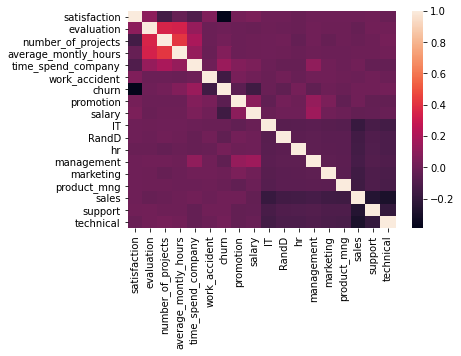

In [20]:
#Checking correlation between different columns
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix)
plt.show()

### Splitting the data

In [23]:
#Setting target variable and features
target=data.churn
features=data.drop("churn",axis=1)

In [27]:
#Splitting the train and test data in ration of 75:25.
from sklearn.model_selection import train_test_split
target_train,target_test,features_train,features_test=train_test_split(target,features,test_size=0.25,random_state=42)

### Fitting the data on decision tree model.

In [28]:
#Importing decisiontree classifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
#Initializing decision tree classifier
model=DecisionTreeClassifier(random_state=42)

In [31]:
#Applying model on training set
model.fit(features_train,target_train)

DecisionTreeClassifier(random_state=42)

In [33]:
#Calculate accuracy on training set
model.score(features_train,target_train)*100

100.0

In [32]:
#Calculate accuracy on test set
model.score(features_test,target_test)*100

97.22666666666666

## Overfitting issue solution

### 1)Limiting tree depth(pruning the tree)

### 2)Limit the sample size in leaf.





### Applying pruning to reduce overfitting in our model.


In [43]:
# Initializing the tree and specifying the maximum depth as 5.
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

In [44]:
# Fit the model
model_depth_5.fit(features_train,target_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [45]:
# Calculate the accuracy of the prediction for the training set
print(model_depth_5.score(features_train,target_train)*100)

97.71535247577563


In [46]:
# Calculate the accuracy of the prediction for the test set
print(model_depth_5.score(features_test,target_test)*100)

97.06666666666666


### By pruning the tree,we observe that we have been able achieve a accuracy score for training set and test set which are almost equal.

### Limiting sample size to reduce overfitting.

In [47]:
# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)


In [48]:
# Fit the model
model_sample_100.fit(features_train,target_train)


DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

In [49]:
# Calculate the accuracy of the prediction  for the training set
print(model_sample_100.score(features_train,target_train)*100)


96.57747355320473


In [50]:
# Calculate the accuracy of the prediction  for the test set
print(model_sample_100.score(features_test,target_test)*100)

96.13333333333334


### By limiting sample size we have been able to achieve almost equal score for training set and test set.

### Evaluating prediction model

In [54]:
# Import the function to calculate precision score,recall score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [52]:
# Predict whether employees will churn using the test set
prediction = model.predict(features_test)

In [53]:
# Calculate precision score by comparing target_test with the prediction
precision_score(target_test, prediction)

0.9240641711229947

In [56]:
#Calculate recall score by comparing target_test with prediction
recall_score(target_test,prediction)

0.9632107023411371

### Calculating AUC score so that we can maximize specifity and recall both.|

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
roc_auc_score(target_test,prediction)

0.9691623087590718

### Solving the problem of class imbalance.

#### Class imbalance leads to higher accuracy but favors one class because of which we struggle make a perfect fit model.Hence we will assign both class equal probability and then calculate  

In [65]:
# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,random_state=42)

In [60]:
# Fit the model
model_depth_5_b.fit(features_train,target_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [61]:
#Calculate accuracy score after balancing both the classes
print(model_depth_5_b.score(features_test,target_test)*100)

93.70666666666668


### Now we will experiment with imbalanced and balance class for decision tree of depth 7 and analyze that which one gives us a better result.

In [66]:
# Initialize the  balanced model
model_depth_7_b =DecisionTreeClassifier(max_depth=7,class_weight="balanced",random_state=42) 
# Fit it to the training component
model_depth_7_b.fit(features_train,target_train)
# Make prediction using test component
prediction_b =model_depth_7_b.predict(features_test) 
# Print the recall score for the balanced model
print(recall_score(target_test,prediction_b))
# Print the ROC/AUC score for the balanced model
print(roc_auc_score(target_test,prediction_b))

0.9319955406911928
0.959863876199084


### Calculating cross validation score.

In [69]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.98533333 0.98533333 0.974      0.96533333 0.96       0.97933333
 0.99       0.99333333 1.         1.        ]


### Setting up parameters for grid search

In [70]:
#Generating values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

### Implementing grid search

In [71]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


In [77]:
model_best = DecisionTreeClassifier(max_depth=5, random_state=42)
model_best.fit(features_train,target_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

### Calculating important features

In [78]:
# Calculate feature importances
feature_importances = model_best.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort the DataFrame to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.535522
time_spend_company,0.152146
evaluation,0.151002
number_of_projects,0.097404
average_montly_hours,0.062417
technical,0.001510
promotion,0.000000
salary,0.000000
work_accident,0.000000
RandD,0.000000


In [80]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]
print(selected_features)

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]


                      importance
satisfaction            0.535522
evaluation              0.151002
number_of_projects      0.097404
average_montly_hours    0.062417
time_spend_company      0.152146


### Developing and testing the best model


In [83]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth=8, min_samples_leaf=150, class_weight="balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print("accuracy =",model_best.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print("recall_score =",recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print("roc_auc_score =",roc_auc_score(target_test, prediction_best) * 100)

accuracy = 95.28
recall_score = 91.75027870680044
roc_auc_score = 94.07002193314084
